課題１：特徴選択

まず yellowbrick の 再帰特徴削減(RFE) を走らせてみる．
UCIのデータセットなど選んでやってみる

再帰的特徴除去（RFE）は、モデルを適合させ、
指定された特徴数に達するまで最も弱い特徴（または特徴）を除去する特徴選択法です。
特徴はモデルのcoef_またはfeature_importances_属性によってランク付けされ、
ループごとに少数の特徴を再帰的に除去することで、
RFEはモデルに存在する可能性のある依存性と共線性を除去しようとします。

RFEでは、保持するために指定された数の特徴を必要としますが、
どれだけの特徴が有効であるかは事前にわからないことが多いです。
最適な特徴の数を見つけるために、RFEでクロスバリデーションを使用して、
異なる特徴のサブセットをスコア化し、最もスコア化された特徴の集合を選択します。
RFECV ビジュアライザーは、モデル内の特徴の数をクロスバリデーションされたテスト・スコアと
ばらつきとともにプロットし、選択された特徴の数を可視化します。

これが実際にどのように機能するかを示すために、
25個のうち情報量の多い特徴を3個しか持たないデータセットを使った例から始めます。

d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


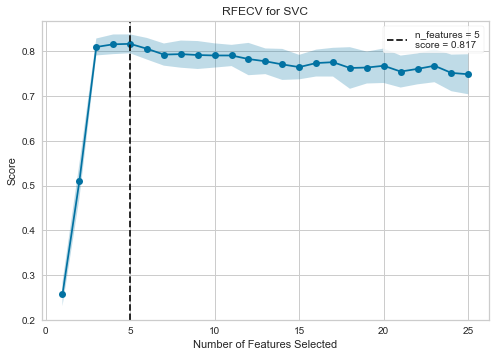

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.model_selection import RFECV

# Create a dataset with only 3 informative features
X, y = make_classification(
    n_samples=1000, n_features=25, n_informative=3, n_redundant=2,
    n_repeated=0, n_classes=8, n_clusters_per_class=1, random_state=0
)

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

この図は理想的なRFECV曲線を示しており、3つの情報的特徴が捕捉されると曲線は優れた精度にジャンプし、
その後、非情報的特徴がモデルに追加されると徐々に精度が低下します。
網掛けの領域は、クロスバリデーションの変動性を表し、
曲線によって描かれた平均精度スコアの上と下の1標準偏差を表しています。

実際のデータセットを探索すると、信用デフォルトのバイナリ分類器でのRFECVの影響を見ることができます。

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import RFECV
from yellowbrick.datasets import load_credit

# Load classification dataset
X, y = load_credit()

cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

この例では、19個の特徴が選択されていることがわかりますが、
5個程度の特徴の後ではモデルのf1スコアはあまり改善されていないように見えます。
除去する特徴の選択は、各再帰の結果を決定する上で大きな役割を果たします。
各ステップで複数の特徴を除去するようにステップパラメータを変更すると、
最悪の特徴を早期に除去し、残りの特徴を強化するのに役立つかもしれません
（また、特徴の数が多いデータセットの特徴除去を高速化するために使用することもできます）。
